# ***Project Titanic***

# **Business Understanding**

## Introduction

Tenggelamnya RMS Titanic terjadi pada dini hari tanggal 15 April 1912 di Samudra Atlantik Utara, empat hari setelah pelayaran perdananya dari Southampton menuju New York City. Titanic merupakan kapal samudra terbesar yang beroperasi pada masa itu, yang mengangkut kurang lebih 2.224 penumpang ketika menabrak gunung es kira-kira pukul 23.40 (waktu kapal) pada hari Minggu, 14 April 1912. Kapal tersebut tenggelam dua jam empat puluh menit kemudian pada pukul 02.20 waktu kapal (05:18 GMT) hari Senin, 15 April, mengakibatkan lebih dari 1.500 penumpang dan awak tewas, menjadikannya salah satu bencana maritim masa damai paling mematikan dalam sejarah.

Titanic menerima enam peringatan bahaya es laut pada tanggal 14 April, tetapi sedang melaju dengan kecepatan 22 knot (41 km/h) ketika pengintai melihat keberadaan gunung es. Kapal tidak bisa berbelok dengan cukup cepat dan menabrak gunung es, yang melekukkan sisi kanan kapal dan melubangi enam dari enam belas kompartemennya. Titanic dirancang untuk tetap mengapung jika empat kompartemennya bocor, dan para awak segera menyadari bahwa kapal akan tenggelam. Mereka menggunakan suara mara bahaya dan pesan radio nirkabel untuk meminta bantuan selagi penumpang diungsikan ke sekoci.

Resource: https://id.wikipedia.org/wiki/Tenggelamnya_RMS_Titanic#Referensi

## Problem Statement

Melalui analisis dataset Titanic, tujuan penelitian ini adalah untuk menentukan faktor-faktor yang paling signifikan dalam mempengaruhi tingkat kelangsungan hidup penumpang. Analisis akan mencakup variabel seperti kelas tiket, jenis kelamin, usia, dan jumlah saudara kandung atau pasangan. Hasil analisis ini diharapkan dapat memberikan wawasan yang mendalam tentang karakteristik penumpang yang memiliki tingkat kelangsungan hidup lebih tinggi, yang pada gilirannya dapat membantu dalam pengembangan kebijakan keselamatan kapal atau rekomendasi pelayaran di masa depan.

## Metrics Evaluation

1. **Precision**: Karena kita ingin meminimalkan jumlah prediksi yang salah tentang orang yang tidak selamat. Artinya kita ingin mengurangi prediksi salah orang yang tidka selamat tapi kenyataannya selamat.
2. **AUC-ROC**:  mengukur kualitas keseluruhan model untuk memisahkan kelas positif dan negatif. Kurva ROC (Receiver Operating Characteristic) memplot nilai True Positive Rate (Recall) terhadap False Positive Rate pada berbagai threshold. AUC-ROC memberikan nilai keseluruhan kinerja model independen dari threshold.

## Variable Description

**PassengerId**: unique id number to each passenger <br>
**Survived**: passenger survive(1) or died(0) <br>
**Pclass**: passenger class <br>
**Name**: name <br>
**Sex**: gender of passenger <br>
**Age**: age of passenger <br>
**SibSp**: number of siblings/spouses <br>
**Parch**: number of parents/children <br>
**Ticket**: ticket number <br>
**Fare**: amount of money spent on ticket <br>
**Cabin**: cabin category <br>
**Embarked**: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton) <br>

# **Data Understanding**

## Data Exploration

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data = pd.read_csv('F:/Qarir Generator/Project Data Analysis/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# quick look
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Dari informasi diatas bahwa data yang dimiliki mempunyai 12 kolom dan 891 baris. Dimana kolom "Age", "Cabin", "Embarked" terdapat missing value. Sehingga perlu dihandling sebelum dilakukan modeling. Selain itu, untuk type data setiap kolom perlunya dilakukan tindak lanjut lagi apakah sudah sesuai atau tidak.**

In [4]:
# statistik deskriptif kolom kategorik
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Dari hasil diatas kami mendapat informasi bahwa kolom "Name" semua value nya unik tidak ada duplikat. Kolom "Sex" memiliki 2 nilai unik dengan top nya adalah male. Kolom "Embarked" memilki 3 nilai unik dengan topnya adalah S.**

In [5]:
# statistik deskriptif kolom kategorik
data.describe(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Dari hasil diatas kami mendapat informasi bahwa kolom "Age" penumpang termuda berumur 20 tahun dan tertua 80 tahun, dan rata-rata 30 tahun dengan nilai median 28 tahun. Kolom "Fare" penumpang kapal membayar tiket dengan harga 0 minimal dan maksimal 512.33, dan rata-rata penumpang mengeluarkan biaya tiket sebesar 32.20 dengan nilai median 14.45.**

In [6]:
for i in data.select_dtypes(include='object').columns.tolist():
    data_unik = (data[i].value_counts(normalize=True)*100)
    print(data_unik)
    print('\n')

Braund, Mr. Owen Harris                     0.112233
Boulos, Mr. Hanna                           0.112233
Frolicher-Stehli, Mr. Maxmillian            0.112233
Gilinski, Mr. Eliezer                       0.112233
Murdlin, Mr. Joseph                         0.112233
                                              ...   
Kelly, Miss. Anna Katherine "Annie Kate"    0.112233
McCoy, Mr. Bernard                          0.112233
Johnson, Mr. William Cahoone Jr             0.112233
Keane, Miss. Nora A                         0.112233
Dooley, Mr. Patrick                         0.112233
Name: Name, Length: 891, dtype: float64


male      64.758698
female    35.241302
Name: Sex, dtype: float64


347082      0.785634
CA. 2343    0.785634
1601        0.785634
3101295     0.673401
CA 2144     0.673401
              ...   
9234        0.112233
19988       0.112233
2693        0.112233
PC 17612    0.112233
370376      0.112233
Name: Ticket, Length: 681, dtype: float64


B96 B98        1.960784
G6      

In [7]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Visualization and Insight

### Univariate Analysis

In [8]:
# mengelompokkan data menjadi dua grub
kategorik = [i for i in data.select_dtypes(include='object').columns.tolist() if i != 'Name' and i != 'Ticket' and i != 'Cabin']
numerik = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]

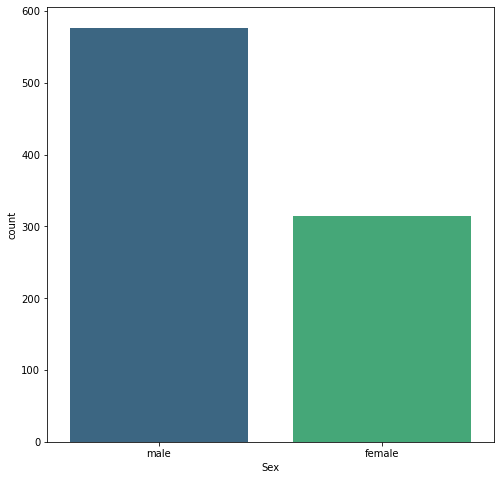

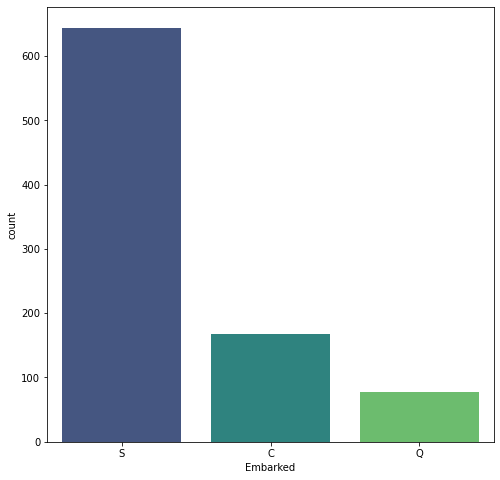

In [9]:
# visualisasi data kategorik
for i in kategorik:
    plt.figure(figsize=(8,8))
    sns.countplot(data=data, x=data[i], palette='viridis')
    plt.show()

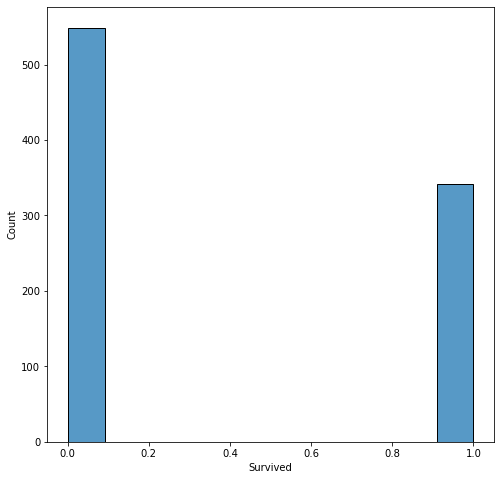

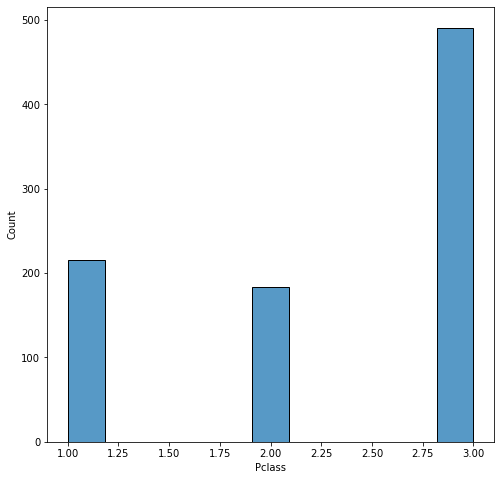

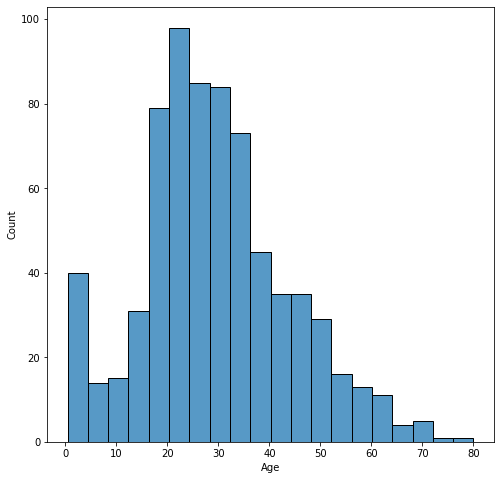

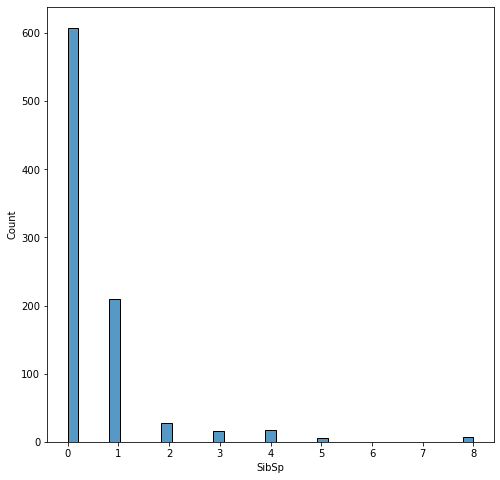

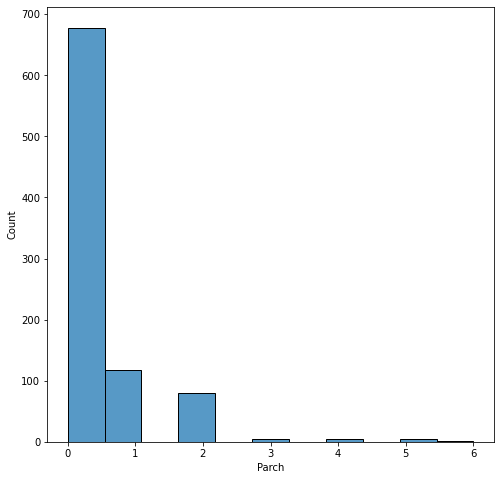

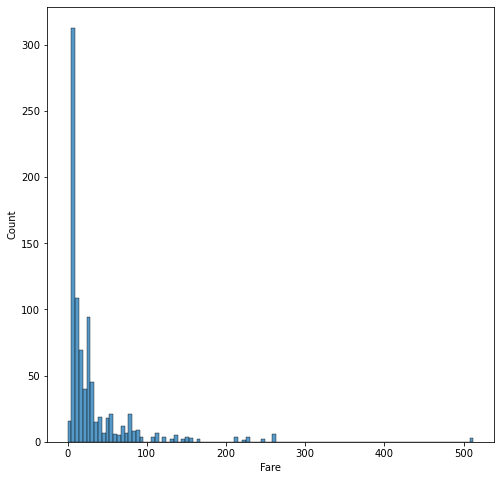

In [10]:
# visualisasi data numerik
for i in numerik:
    plt.figure(figsize=(8,8))
    sns.histplot(data=data, x=data[i], palette='viridis')
    plt.show()

### Bivariate Analysis

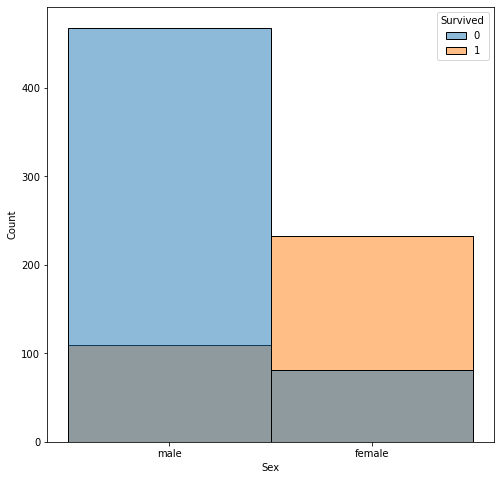

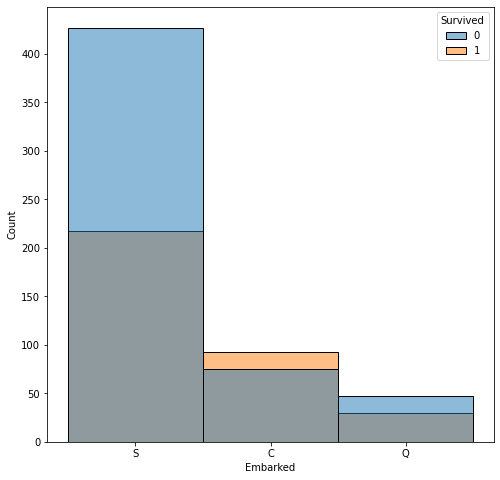

In [11]:
# visualisasi data kategorik
for i in kategorik:
    plt.figure(figsize=(8,8))
    sns.histplot(data=data, x=data[i], hue = data['Survived'])
    plt.show()

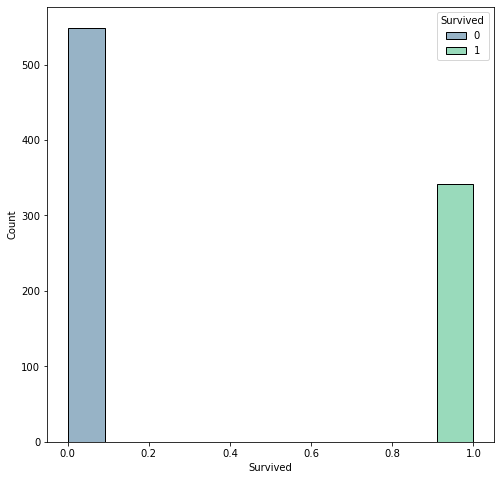

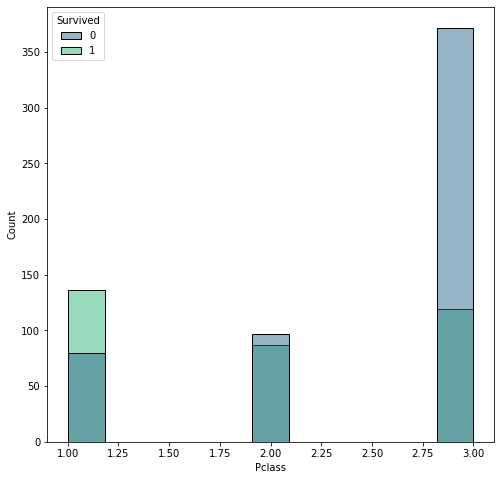

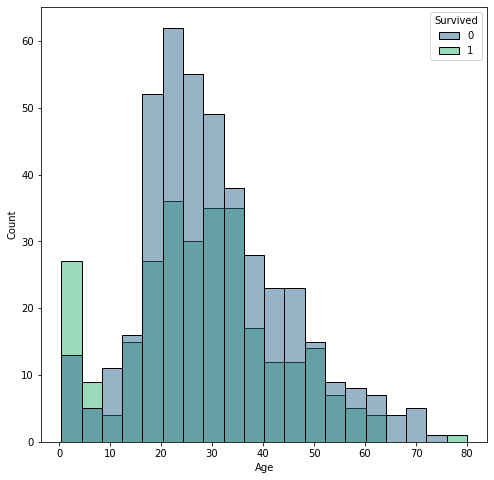

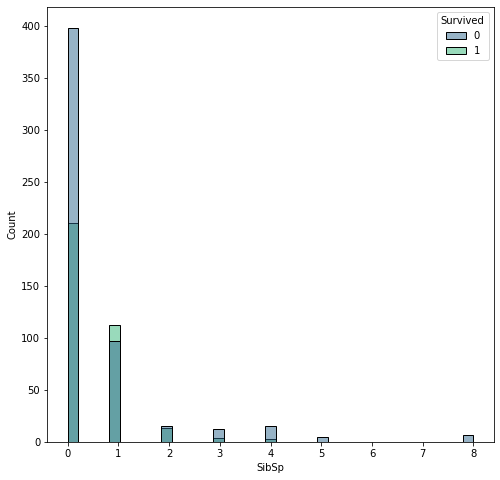

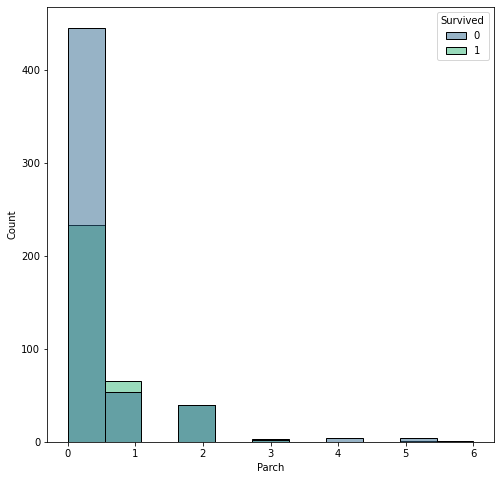

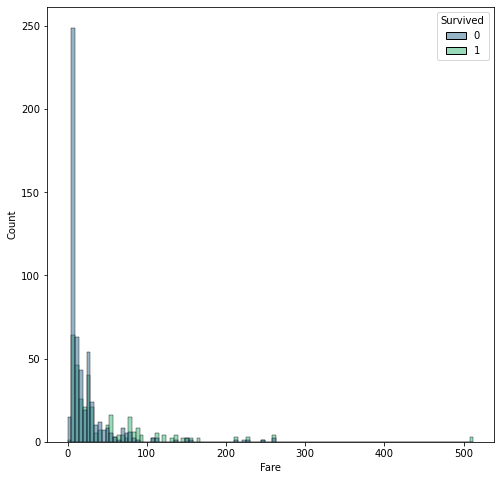

In [12]:
# visualisasi data numerik
for i in numerik:
    plt.figure(figsize=(8,8))
    sns.histplot(data=data, x=data[i], hue=data['Survived'], palette='viridis')
    plt.show()

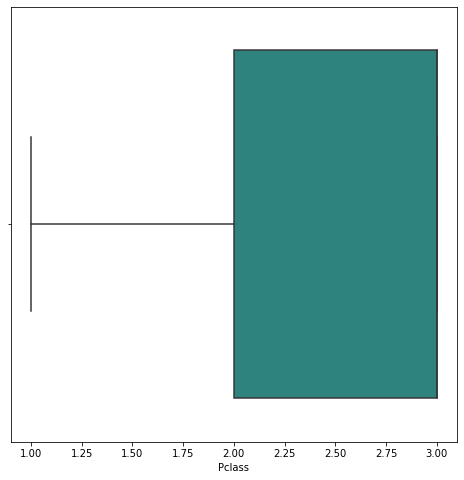

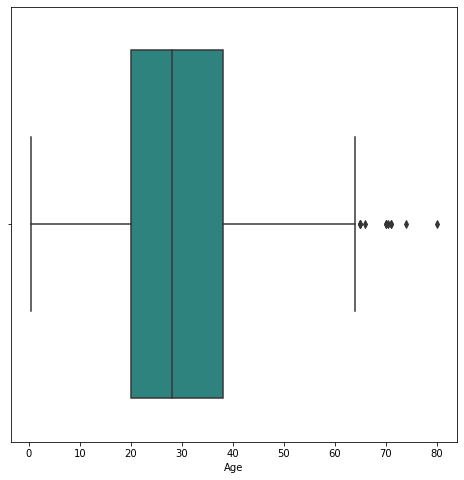

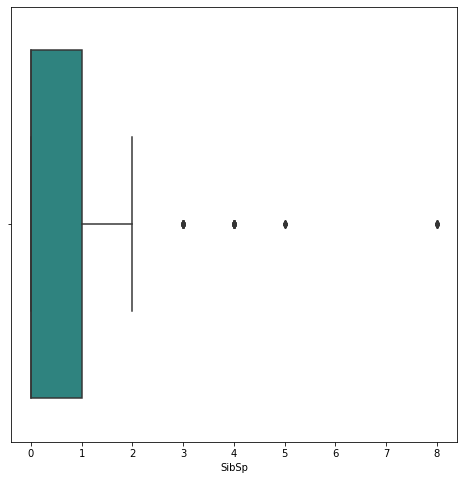

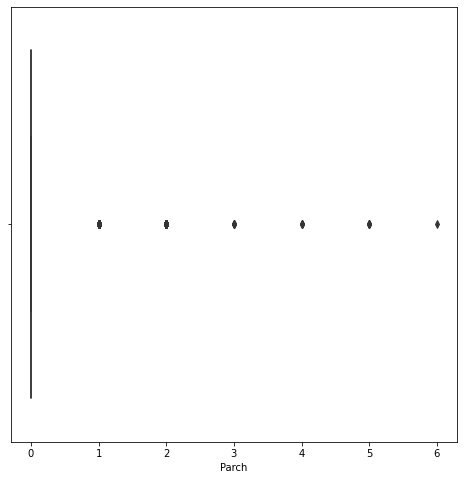

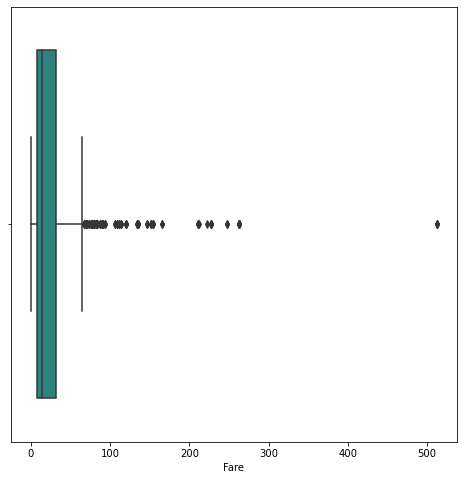

In [13]:
# visualisasi data numerik
for i in data[['Pclass','Age','SibSp','Parch','Fare']]:
    plt.figure(figsize=(8,8))
    sns.boxplot(data=data, x=data[i], palette='viridis')
    plt.show()

### Multivariate Analysis

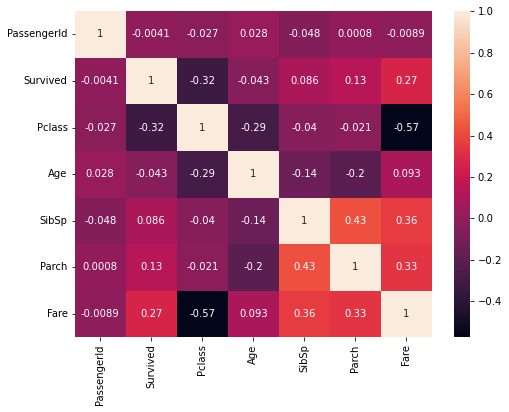

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method = 'kendall'), annot = True)
plt.show()

**Dari visualisasi heatmap diatas feature yang relevan dengan feature Survived adalah "Fare", "Parch", "Pclass". Namun demikian visualisasi diatas hanya feature-feature numerik yang bisa di visualisasi. Oleh karena itu, perlu dilakukan pengujian labih lanjut untuk feature kategorik.**

### Uji Chi Square Test

In [15]:
def chi_square_test(df , col , target):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print("Is there a correlation between :" + col + " and " + target + "?" )
    print(contingency_table)
    print("Chi-squared value:", chi2)
    print("p-value:", p_value)
    if p_value <= 0.05:
        print('The variables are Dependent (reject H0)')
    else:
        print('The variables are Independent (H0 holds true)')

In [16]:
import scipy.stats as stats

# Fitur Numerik dengan fitur target
for col  in data.select_dtypes(exclude='object').columns.tolist():
                    chi_square_test(data , col , 'Survived')
                    print(" ")

Is there a correlation between :PassengerId and Survived?
Survived     0  1
PassengerId      
1            1  0
2            0  1
3            0  1
4            0  1
5            1  0
...         .. ..
887          1  0
888          0  1
889          1  0
890          0  1
891          1  0

[891 rows x 2 columns]
Chi-squared value: 891.0
p-value: 0.484248151973633
The variables are Independent (H0 holds true)
 
Is there a correlation between :Survived and Survived?
Survived    0    1
Survived          
0         549    0
1           0  342
Chi-squared value: 886.7768022383253
p-value: 7.352052198553542e-195
The variables are Dependent (reject H0)
 
Is there a correlation between :Pclass and Survived?
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-squared value: 102.88898875696056
p-value: 4.549251711298793e-23
The variables are Dependent (reject H0)
 
Is there a correlation between :Age and Survived?
Survived  0  1
Age           
0.4

**Dari pengujian chi square test diatas feature-feature numerik yang relevan dengan feature Survived adalah "Fare", "Parch", "Pclass".**

In [17]:
import scipy.stats as stats

# Fitur kategorik dengan fitur target
for col  in data.select_dtypes(include='object').columns.tolist():
                    chi_square_test(data , col , 'Survived')
                    print(" ")

Is there a correlation between :Name and Survived?
Survived                               0  1
Name                                       
Abbing, Mr. Anthony                    1  0
Abbott, Mr. Rossmore Edward            1  0
Abbott, Mrs. Stanton (Rosa Hunt)       0  1
Abelson, Mr. Samuel                    1  0
Abelson, Mrs. Samuel (Hannah Wizosky)  0  1
...                                   .. ..
de Mulder, Mr. Theodore                0  1
de Pelsmaeker, Mr. Alfons              1  0
del Carlo, Mr. Sebastiano              1  0
van Billiard, Mr. Austin Blyler        1  0
van Melkebeke, Mr. Philemon            1  0

[891 rows x 2 columns]
Chi-squared value: 891.0
p-value: 0.484248151973633
The variables are Independent (H0 holds true)
 
Is there a correlation between :Sex and Survived?
Survived    0    1
Sex               
female     81  233
male      468  109
Chi-squared value: 260.71702016732104
p-value: 1.1973570627755645e-58
The variables are Dependent (reject H0)
 
Is there a corr

**Dari pengujian chi square test diatas feature-feature kategorik yang relevan dengan feature Survived adalah "Sex", "Ticket", "Embarked".**

# **Data Pre-Processing**

## Data Cleansing

In [18]:
# mengcopy data asli
data_clean = data.copy()
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Value

In [19]:
# missing value
data_clean.isna().sum()/len(data_clean)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Terlihat bahwa terdapat 3 kolom yang memiliki missing value, kolom "Age" terdapat 20% missing value, kolom "Cabin" terdapat 77%, dan kolom "Embarked" 0.22% missing value.** 

In [20]:
data_clean['Age'].describe(percentiles=[0.1,0.25,0.75,0.9])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
25%       20.125000
50%       28.000000
75%       38.000000
90%       50.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
data_clean['Embarked'].describe(exclude='object')

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

**Berdasarkan statistika descriptive diatas kolom "Age" terdapat nilai outlier namun disini kami tidak akan menghandle nilai outlier karena nilai tersebut masih masuk akal dan tidak terlalu banyak juga nilai outliernya. Dan disini saya akan menghandle kolom "Age" dengan menggunakan nilai median pada kolom tersebut.** <br>
**Dan untuk kolom "Embarked" akan dihandle dengan modus dari kolom tersebut yaitu S.**

In [22]:
# handle miss value pada kolom "Age"
data_clean['Age'].fillna(28, inplace=True)

In [23]:
# handle miss value pada kolom "Cabin"
data_clean.drop(columns=['Cabin'], inplace=True)

In [24]:
# handle miss value pada kolom "Embarked"
data_clean['Embarked'].fillna('S', inplace=True)

In [25]:
# periksa missing value pada setiap kolom
data_clean.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Duplikat

In [26]:
data_clean.duplicated().sum()

0

### Data Inkonsisten

In [27]:
data_clean.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.0,0,0,330980,7.8792,Q
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,Q
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,S


**Ada 2 kolom yang perlu diperbaiki terkait inkonsisten data, yaitu kolom "Name" dan "Ticket".**

In [28]:
# handle kolom "Name"
import re

data_clean['Name']=data_clean['Name'].str.split(',').str[-1].str.strip()
data_clean['Name'] = data_clean['Name'].apply(lambda x: re.sub(r'\([^)]*\)', '', x).strip())
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S


In [29]:
# handle kolom "Ticket"
data_clean["Ticket"] = data_clean['Ticket'].str.split(' ').str[-1].str.strip()
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,21171,7.2500,S
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,17599,71.2833,C
2,3,1,3,Miss. Laina,female,26.0,0,0,3101282,7.9250,S
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S


**Terlihat bahwa semua kolom sudah konsisten pada setiap kolom.**

### Outlier

**Berdasarkan statistika descriptive diatas kolom "Age", "Fare", "SibSp", "Parch" terdapat nilai outlier namun disini kami tidak akan menghandle nilai outlier karena nilai tersebut masih masuk akal dan tidak terlalu banyak juga nilai outliernya.**

## Feature Extraction

In [30]:
# menambahkan kolom "Age_group"
age_group={'balita' : list(range(0,6)),
          'anak-anak' : list(range(6,11)),
          'remaja' : list(range(11,18)),
          'anak muda' : list(range(18,30)),
          'dewasa' : list(range(30,60)),
          'lansia' : list(range(60,81))}

data_clean['Age_group'] = data_clean['Age'].apply(lambda x: next(
    (k for k, v in age_group.items() if any((isinstance(x, float) and val <= x < val + 1) or x == val for val in v)),
    'Other'))
data_clean['Age_group'].unique()

array(['anak muda', 'dewasa', 'balita', 'remaja', 'anak-anak', 'lansia'],
      dtype=object)

In [31]:
# menambahkan kolom "Jumlah_tanggungan"
data_clean['Jumlah_tanggungan'] = data_clean['SibSp'] + data_clean['Parch']
data_clean['Jumlah_tanggungan'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [32]:
# menambahkan kolom "Ticket_class"
ticket_class = {'karyawan': [0],
                'ekonomi': list(range(1, 41)),
                'premium': list(range(41, 71)),
                'executive': list(range(71, 100)),
                'bisnis': list(range(100, 600))}

data_clean['Ticket_class'] = data_clean['Fare'].apply(lambda x: next(
    (k for k, v in ticket_class.items() if any((isinstance(x, float) and val <= x < val + 1) or x == val for val in v)),
    'Other'))

data_clean['Ticket_class'].unique()

array(['ekonomi', 'executive', 'premium', 'bisnis', 'karyawan'],
      dtype=object)

In [33]:
# melihat 5 data teratas
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,21171,7.2500,S,anak muda,1,ekonomi
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,17599,71.2833,C,dewasa,1,executive
2,3,1,3,Miss. Laina,female,26.0,0,0,3101282,7.9250,S,anak muda,0,ekonomi
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,S,dewasa,1,premium
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S,dewasa,0,ekonomi


## Feature Engineering

### Transformation

In [34]:
# mengcopy data asli
data_scaling = data_clean.copy()

In [35]:
# menglompokkan kolom kategorik
kategorik = [i for i in data_scaling.select_dtypes(include='object').columns.tolist() if i != 'Name' and i != 'Ticket_class']

In [36]:
# mengganti nilai kategorik kedalam nilai numerik
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for k in kategorik:
    data_scaling[k] = label_encoder.fit_transform(data_scaling[k])

In [37]:
# mengganti nilai kategorik kedalam nilai numerik pada kolom "Ticket_class"
mapping = {'bisnis' : 1,
          'executive' : 2,
          'premium' : 3,
          'ekonomi' : 4,
          'karyawan' : 5}

data_scaling['Ticket_class'] = data_scaling['Ticket_class'].apply(lambda x: mapping.get(x,0))

In [38]:
data_scaling.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,3,Mr. Owen Harris,1,22.0,1,0,161,7.2500,2,0,1,4
1,2,1,1,Mrs. John Bradley,0,38.0,1,0,126,71.2833,0,3,1,2
2,3,1,3,Miss. Laina,0,26.0,0,0,347,7.9250,2,0,0,4
3,4,1,1,Mrs. Jacques Heath,0,35.0,1,0,51,53.1000,2,3,1,3
4,5,0,3,Mr. William Henry,1,35.0,0,0,606,8.0500,2,3,0,4


### Scaling

Pada kasus ini saya memiliki menggunakna standarisasi karena data yang kita milki mempunyai nilai outlier dan distribusinya tidak normal.

In [39]:
# menglompokkan kolom numerik
numerik = [i for i in data_scaling.select_dtypes(exclude='object').columns.tolist() if i != 'Survived' and i != 'PassengerId']

In [40]:
# standarisasi pada kolom numerik
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for i in numerik:
    data_scaling[i] = ss.fit_transform(data_scaling[i].values.reshape(-1,1))

In [41]:
data_scaling.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,0.827377,Mr. Owen Harris,0.737695,-0.565736,0.432793,-0.473674,-0.842248,-0.502445,0.585954,-0.922899,0.059160,0.415785
1,2,1,-1.566107,Mrs. John Bradley,-1.355574,0.663861,0.432793,-0.473674,-1.018588,0.786845,-1.942303,0.879080,0.059160,-1.914182
2,3,1,0.827377,Miss. Laina,-1.355574,-0.258337,-0.474545,-0.473674,0.094874,-0.488854,0.585954,-0.922899,-0.560975,0.415785
3,4,1,-1.566107,Mrs. Jacques Heath,-1.355574,0.433312,0.432793,-0.473674,-1.396459,0.420730,0.585954,0.879080,0.059160,-0.749198
4,5,0,0.827377,Mr. William Henry,0.737695,0.433312,-0.474545,-0.473674,1.399790,-0.486337,0.585954,0.879080,-0.560975,0.415785


# **Exploratory Data Analysis**

In [42]:
# mengcopy data yang sudah di bersihkan
data_eda = data_clean.copy()
data_eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,21171,7.2500,S,anak muda,1,ekonomi
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,17599,71.2833,C,dewasa,1,executive
2,3,1,3,Miss. Laina,female,26.0,0,0,3101282,7.9250,S,anak muda,0,ekonomi
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,S,dewasa,1,premium
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S,dewasa,0,ekonomi


In [43]:
# Export 
data_eda.to_csv('data_eda.csv', index=False)

## Univariate

In [44]:
# mengelompokkan kolom kategorik dan numerik
kategorik = [i for i in data_eda.select_dtypes(include='object').columns.tolist() if i != 'Name' and i != 'Ticket']
numerik = [i for i in data_eda.select_dtypes(exclude='object').columns.tolist() if i != 'PassengerId']

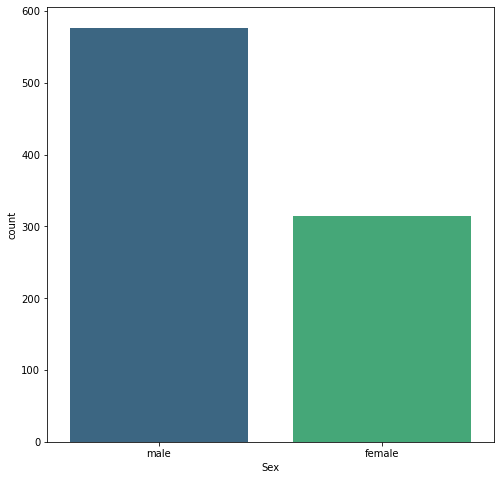

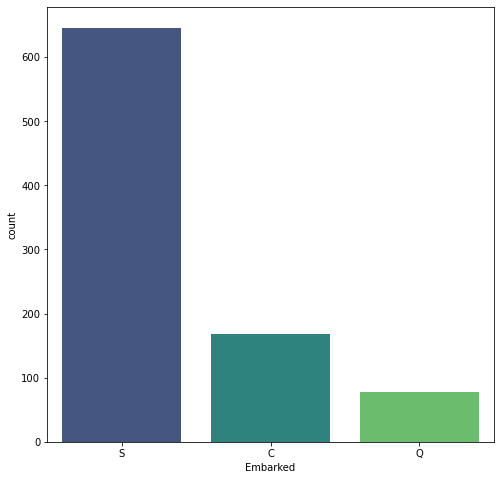

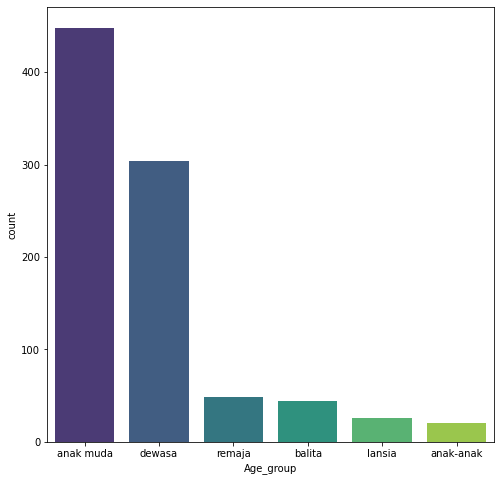

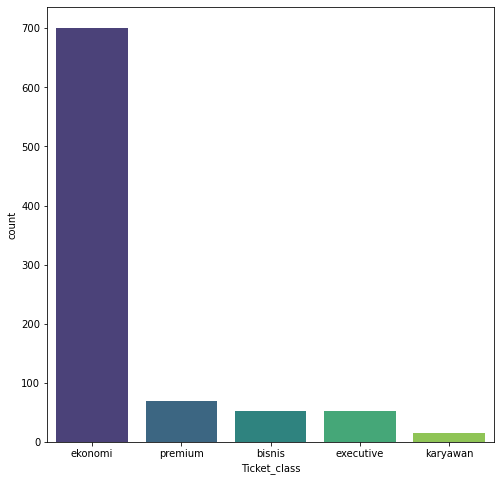

In [45]:
# visualisasi kolom kategorik
for i in kategorik:
    plt.figure(figsize=(8,8))
    sort = data_eda[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data=data_eda, x=data_eda[i], order=sort, palette = 'viridis')
    plt.show()

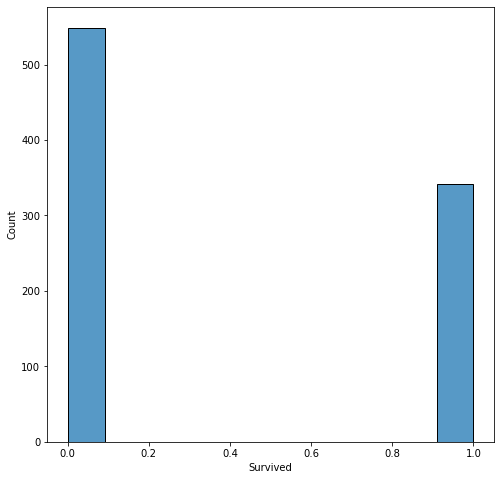

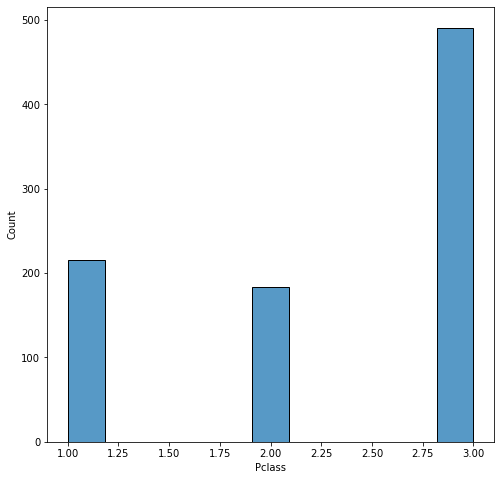

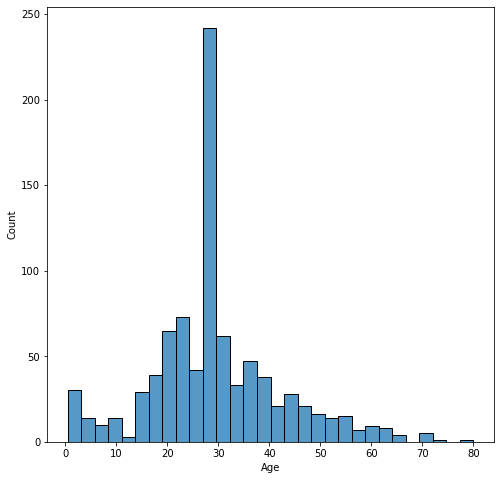

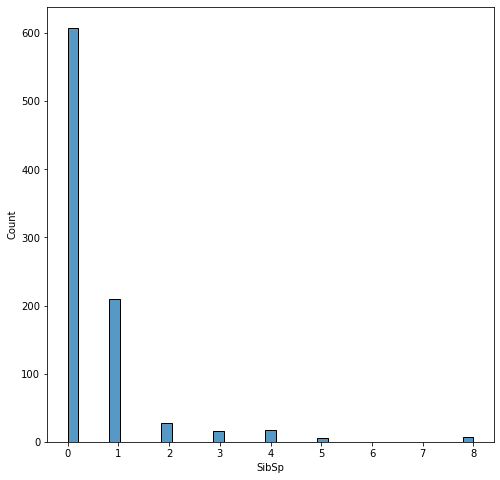

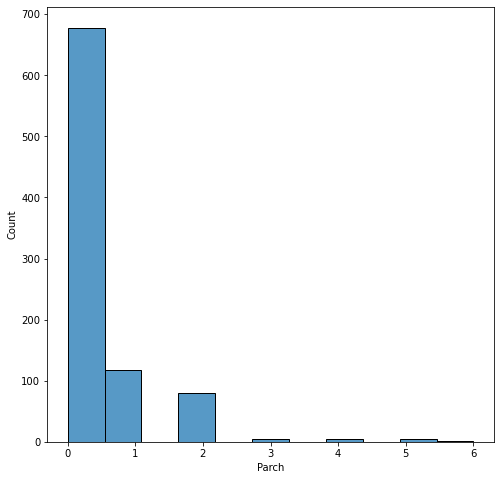

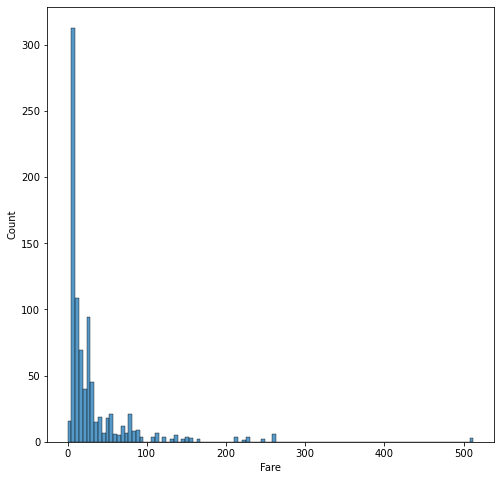

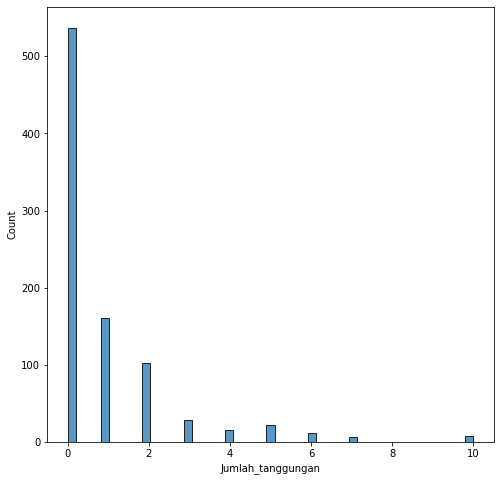

In [69]:
# Visualisasi kolom numerik
for i in numerik:
    plt.figure(figsize=(8,8))
    sns.histplot(data=data_eda, x=data_eda[i], palette = 'viridis')
    plt.show()

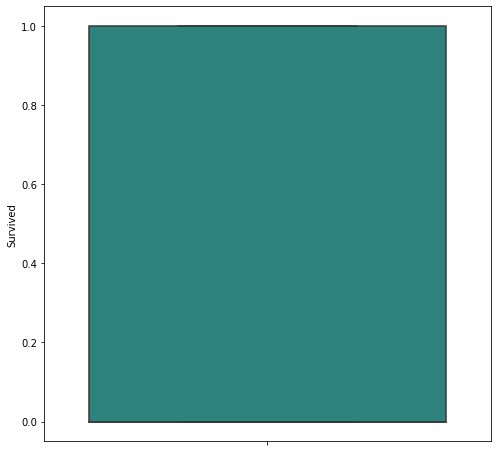

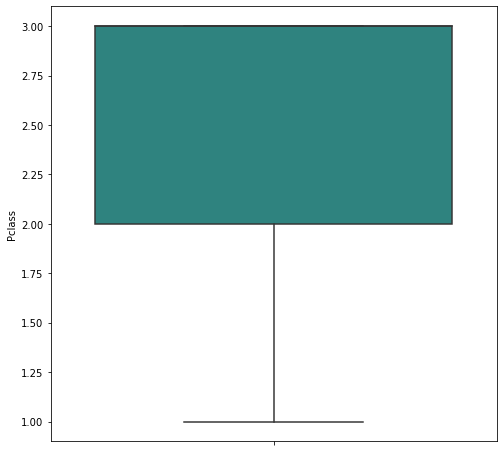

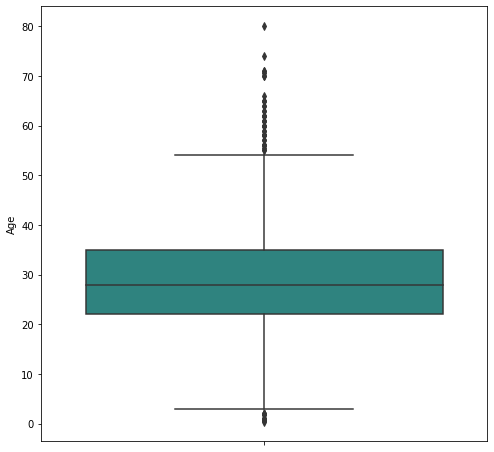

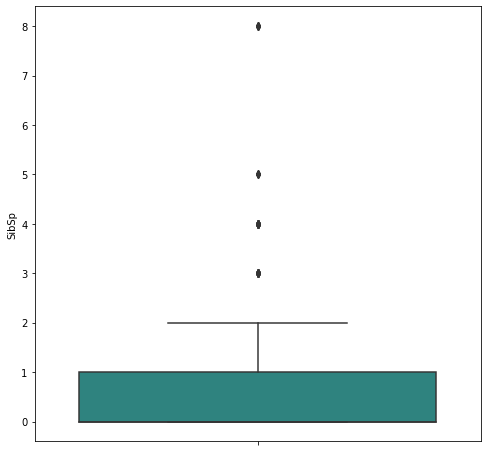

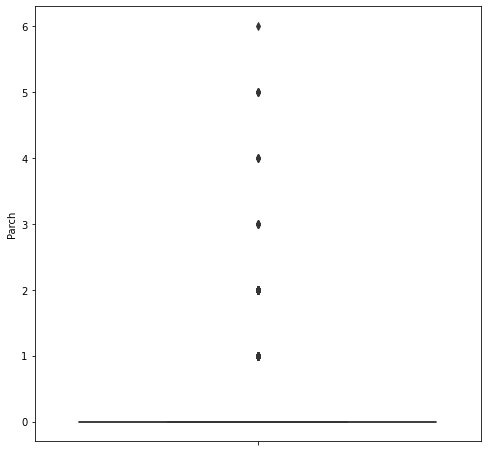

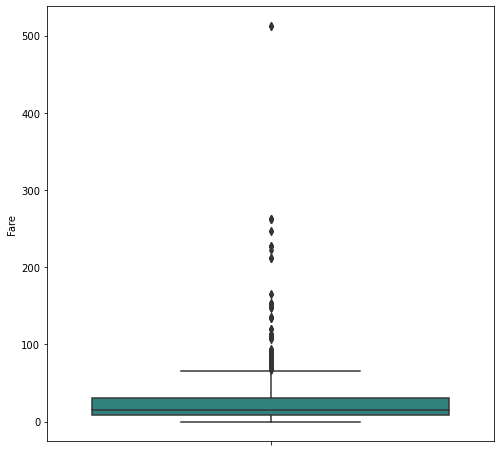

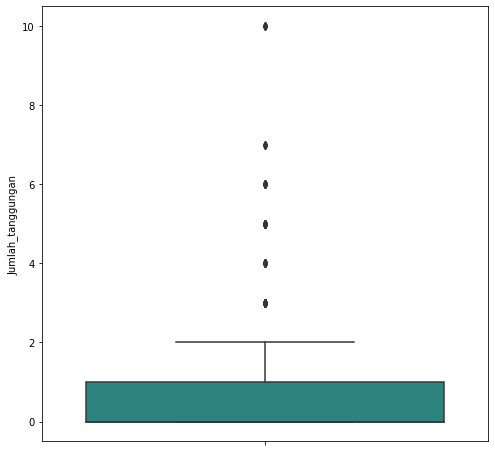

In [47]:
for i in numerik:
    plt.figure(figsize=(8,8))
    sns.boxplot(data=data_eda, y = i, palette = 'viridis')
    plt.show()

## Bivariate

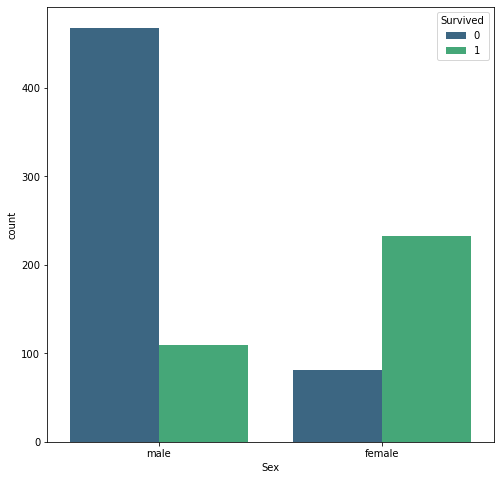

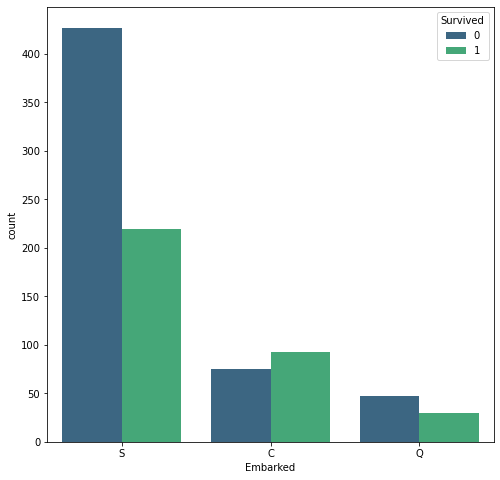

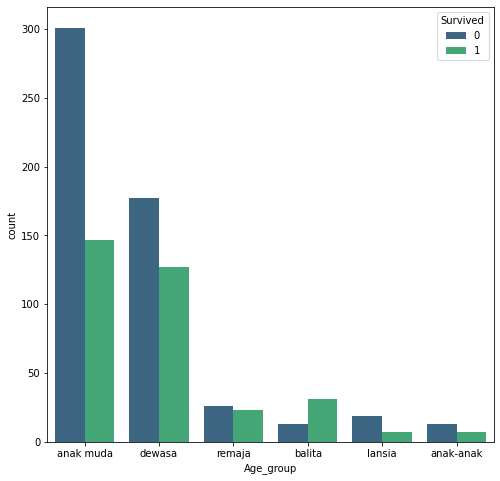

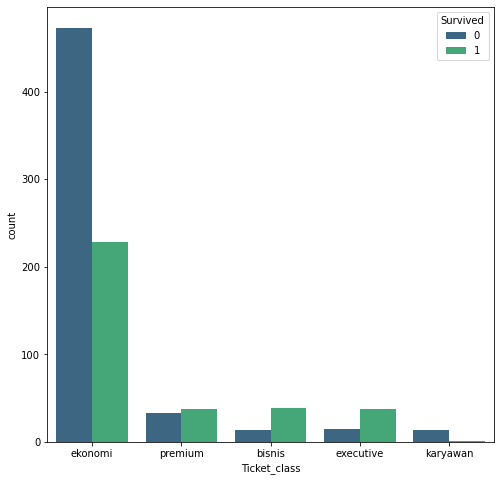

In [48]:
for i in kategorik:
    plt.figure(figsize=(8,8))
    sort = data_eda[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data=data_eda, x=data_eda[i], order=sort, palette = 'viridis', hue='Survived')
    plt.show()

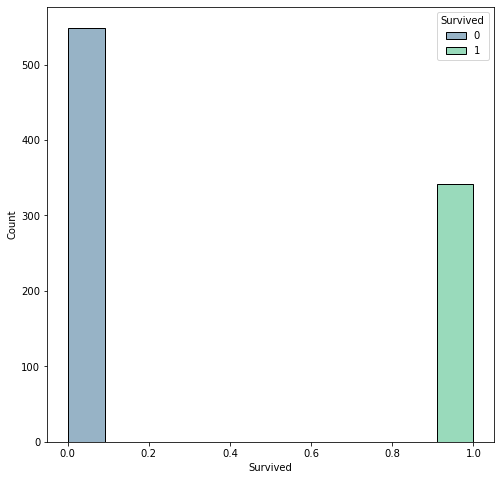

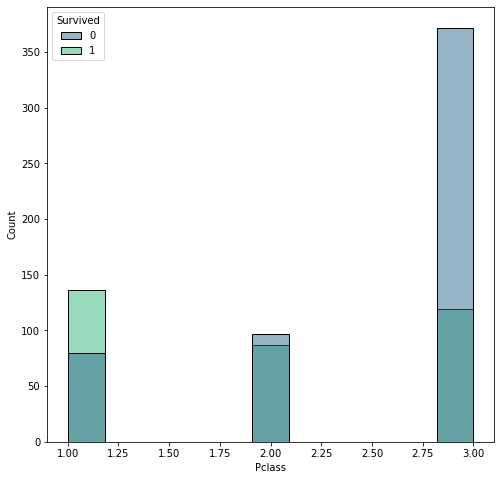

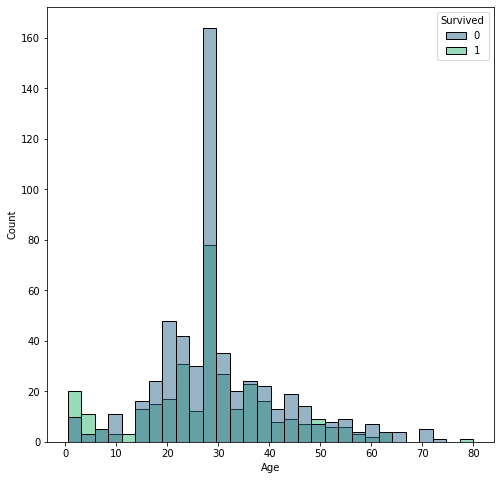

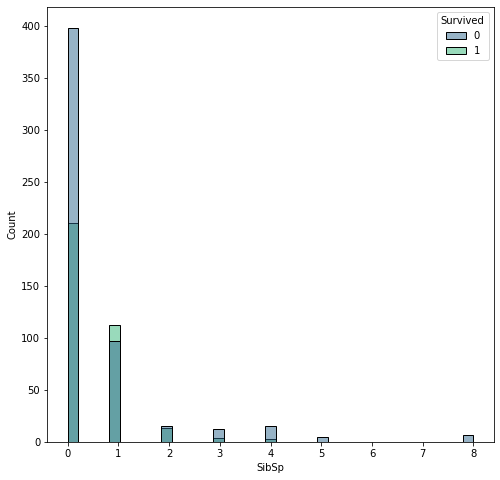

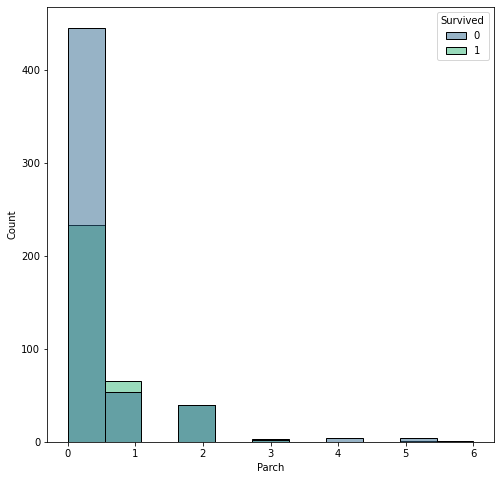

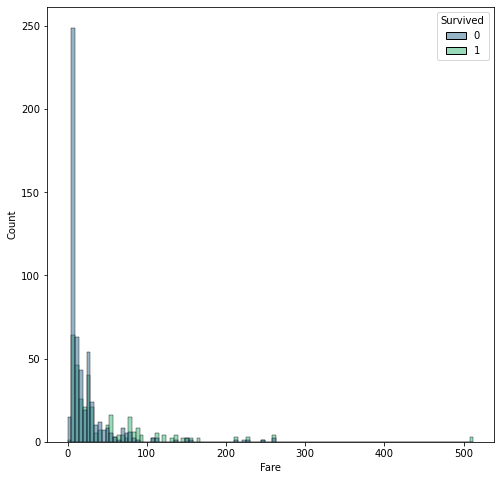

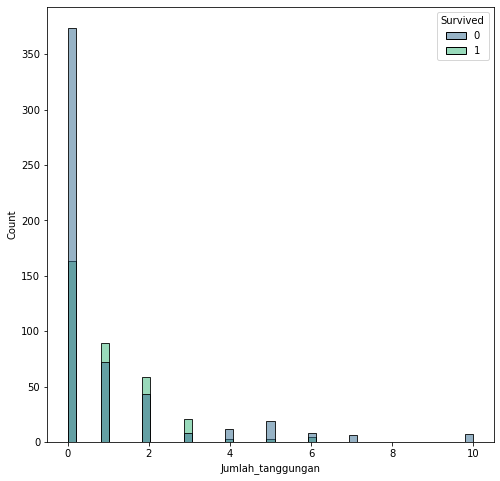

In [49]:
for i in numerik:
    plt.figure(figsize=(8,8))
    sns.histplot(data=data_eda, x=data_eda[i], palette = 'viridis', hue='Survived')
    plt.show()

## Multivariate

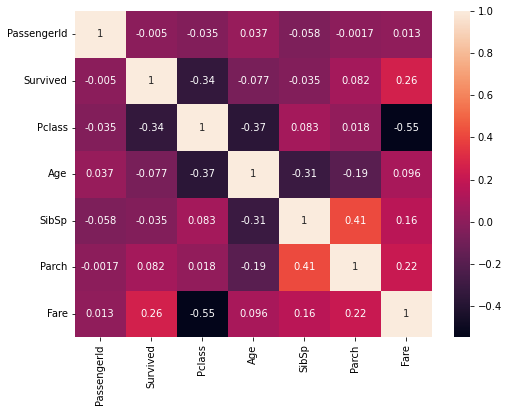

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(data = data.corr(), annot=True)
plt.show()

In [51]:
import scipy.stats as stats

# Fitur Numerik dengan fitur target
for col  in data_eda.select_dtypes(exclude='object').columns.tolist():
                    chi_square_test(data_eda , col , 'Survived')
                    print(" ")

Is there a correlation between :PassengerId and Survived?
Survived     0  1
PassengerId      
1            1  0
2            0  1
3            0  1
4            0  1
5            1  0
...         .. ..
887          1  0
888          0  1
889          1  0
890          0  1
891          1  0

[891 rows x 2 columns]
Chi-squared value: 891.0
p-value: 0.484248151973633
The variables are Independent (H0 holds true)
 
Is there a correlation between :Survived and Survived?
Survived    0    1
Survived          
0         549    0
1           0  342
Chi-squared value: 886.7768022383253
p-value: 7.352052198553542e-195
The variables are Dependent (reject H0)
 
Is there a correlation between :Pclass and Survived?
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-squared value: 102.88898875696056
p-value: 4.549251711298793e-23
The variables are Dependent (reject H0)
 
Is there a correlation between :Age and Survived?
Survived  0  1
Age           
0.4

In [52]:
import scipy.stats as stats

# Fitur Numerik dengan fitur target
for col  in data_eda.select_dtypes(include='object').columns.tolist():
                    chi_square_test(data_eda , col , 'Survived')
                    print(" ")

Is there a correlation between :Name and Survived?
Survived                    0  1
Name                            
Capt. Edward Gifford        1  0
Col. John                   1  0
Col. Oberst Alfons          0  1
Don. Manuel E               1  0
Dr. Alfred                  1  0
...                        .. ..
Rev. Juozas                 1  0
Rev. Robert James           1  0
Rev. Thomas Roussel Davids  1  0
Sir. Cosmo Edmund           0  1
the Countess. of            0  1

[777 rows x 2 columns]
Chi-squared value: 833.2244761493898
p-value: 0.0756230314775437
The variables are Independent (H0 holds true)
 
Is there a correlation between :Sex and Survived?
Survived    0    1
Sex               
female     81  233
male      468  109
Chi-squared value: 260.71702016732104
p-value: 1.1973570627755645e-58
The variables are Dependent (reject H0)
 
Is there a correlation between :Ticket and Survived?
Survived  0  1
Ticket        
10482     0  1
110152    0  3
110413    1  2
110465    2  0
11

In [53]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,21171,7.2500,S,anak muda,1,ekonomi
1,2,1,1,Mrs. John Bradley,female,38.0,1,0,17599,71.2833,C,dewasa,1,executive
2,3,1,3,Miss. Laina,female,26.0,0,0,3101282,7.9250,S,anak muda,0,ekonomi
3,4,1,1,Mrs. Jacques Heath,female,35.0,1,0,113803,53.1000,S,dewasa,1,premium
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S,dewasa,0,ekonomi


# **Modeling**

In [54]:
data_scaling.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Jumlah_tanggungan,Ticket_class
0,1,0,0.827377,Mr. Owen Harris,0.737695,-0.565736,0.432793,-0.473674,-0.842248,-0.502445,0.585954,-0.922899,0.059160,0.415785
1,2,1,-1.566107,Mrs. John Bradley,-1.355574,0.663861,0.432793,-0.473674,-1.018588,0.786845,-1.942303,0.879080,0.059160,-1.914182
2,3,1,0.827377,Miss. Laina,-1.355574,-0.258337,-0.474545,-0.473674,0.094874,-0.488854,0.585954,-0.922899,-0.560975,0.415785
3,4,1,-1.566107,Mrs. Jacques Heath,-1.355574,0.433312,0.432793,-0.473674,-1.396459,0.420730,0.585954,0.879080,0.059160,-0.749198
4,5,0,0.827377,Mr. William Henry,0.737695,0.433312,-0.474545,-0.473674,1.399790,-0.486337,0.585954,0.879080,-0.560975,0.415785


In [55]:
# train test split
from sklearn.model_selection import train_test_split

X = data_scaling.drop(columns=['PassengerId','Survived','Name'], axis=1)
y = data_scaling['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
# SMOTE

X = data_scaling.drop(columns=['PassengerId','Survived','Name'], axis=1)
y = data_scaling['Survived']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

value_counts_resampled = y_resampled.value_counts()

# Menampilkan distribusi kelas setelah oversampling
print("Distribusi Kelas Setelah Oversampling:")
print(value_counts_resampled)

Distribusi Kelas Setelah Oversampling:
0    444
1    444
Name: Survived, dtype: int64


## Logistic Regression

### Before SMOTE

In [57]:
# membangun model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

# prediksi 
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba_train = lr.predict_proba(X_train)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_value = roc_auc_score(y_test, (y_pred_proba[:,1]))
roc_auc_value_train = roc_auc_score(y_train, (y_pred_proba_train[:,1]))

In [59]:
# Tampilkan hasil evaluasi
print(f'Confusion Matrix:\n{conf_matrix}')
print('Accuracy (Test Set): %.2f' % accuracy)
print('Precision (Test Set): %.2f' % precision)
print('Recall (Test Set): %.2f' % recall)
print('F1 Score (Test Set): %.2f' % f1_score)
print('ROC AUC Score (Test Set): %.2f' % roc_auc_value)
print('ROC AUC Score (Train Set): %.2f' % roc_auc_value_train)

Confusion Matrix:
[[91 14]
 [18 56]]
Accuracy (Test Set): 0.82
Precision (Test Set): 0.80
Recall (Test Set): 0.76
F1 Score (Test Set): 0.78
ROC AUC Score (Test Set): 0.89
ROC AUC Score (Train Set): 0.85


### After SMOTE

In [60]:
# membangun model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled,y_resampled)

# prediksi
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba_train_resampled = lr.predict_proba(X_resampled)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_value = roc_auc_score(y_test, (y_pred_proba[:,1]))
roc_auc_value_train = roc_auc_score(y_resampled, (y_pred_proba_train_resampled[:,1]))

In [62]:
# Tampilkan hasil evaluasi
print(f'Confusion Matrix:\n{conf_matrix}')
print('Accuracy (Test Set): %.2f' % accuracy)
print('Precision (Test Set): %.2f' % precision)
print('Recall (Test Set): %.2f' % recall)
print('F1 Score (Test Set): %.2f' % f1_score)
print('ROC AUC Score (Test Set): %.2f' % roc_auc_value)
print('ROC AUC Score (Train Set): %.2f' % roc_auc_value_train)

Confusion Matrix:
[[85 20]
 [12 62]]
Accuracy (Test Set): 0.82
Precision (Test Set): 0.76
Recall (Test Set): 0.84
F1 Score (Test Set): 0.79
ROC AUC Score (Test Set): 0.88
ROC AUC Score (Train Set): 0.85


## Random Forest

### Before SMOTE

In [63]:
# membangun model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)

# prediksi
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred_train = rf.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_value = roc_auc_score(y_test, (y_pred_proba[:,1]))
roc_auc_value_train = roc_auc_score(y_train, (y_pred_proba_train[:,1]))

In [65]:
# Tampilkan hasil evaluasi
print(f'Confusion Matrix:\n{conf_matrix}')
print('Accuracy (Test Set): %.2f' % accuracy)
print('Precision (Test Set): %.2f' % precision)
print('Recall (Test Set): %.2f' % recall)
print('F1 Score (Test Set): %.2f' % f1_score)
print('ROC AUC Score (Test Set): %.2f' % roc_auc_value)
print('ROC AUC Score (Train Set): %.2f' % roc_auc_value_train)

Confusion Matrix:
[[97  8]
 [26 48]]
Accuracy (Test Set): 0.81
Precision (Test Set): 0.86
Recall (Test Set): 0.65
F1 Score (Test Set): 0.74
ROC AUC Score (Test Set): 0.89
ROC AUC Score (Train Set): 0.85


### After SMOTE

In [66]:
# membangun model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4)
rf.fit(X_resampled,y_resampled)

# prediksi
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred_train_resampled = rf.predict(X_resampled)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_value = roc_auc_score(y_test, (y_pred_proba[:,1]))
roc_auc_value_train = roc_auc_score(y_resampled, (y_pred_proba_train_resampled[:,1]))

In [68]:
# Tampilkan hasil evaluasi
print(f'Confusion Matrix:\n{conf_matrix}')
print('Accuracy (Test Set): %.2f' % accuracy)
print('Precision (Test Set): %.2f' % precision)
print('Recall (Test Set): %.2f' % recall)
print('F1 Score (Test Set): %.2f' % f1_score)
print('ROC AUC Score (Test Set): %.2f' % roc_auc_value)
print('ROC AUC Score (Train Set): %.2f' % roc_auc_value_train)

Confusion Matrix:
[[90 15]
 [19 55]]
Accuracy (Test Set): 0.81
Precision (Test Set): 0.79
Recall (Test Set): 0.74
F1 Score (Test Set): 0.76
ROC AUC Score (Test Set): 0.88
ROC AUC Score (Train Set): 0.85


## Result Model

1. Logistic Regression Before SMOTE: Precision 0.80, ROC AUC Score (Test Set): 0.89, ROC AUC Score (Train Set): 0.85
2. Logistic Regression After SMOTE: Precision 0.76, ROC AUC Score (Test Set): 0.88, ROC AUC Score (Train Set): 0.85
3. **Random Forest Classifier Before SMOTE: Precision 0.86, ROC AUC Score (Test Set): 0.89, ROC AUC Score (Train Set): 0.85**
4. Random Forest Classifier After SMOTE: Precision 0.79, ROC AUC Score (Test Set): 0.88, ROC AUC Score (Train Set): 0.85

Model yang fit adalah Random Forest Clasifier tanpa dilakukan SMOTE sebelumnya.

## Feature Importence

In [82]:
def show_feature_importance(model):
    feat_importance = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importance.nlargest(25).plot(kind='barh', figsize=(10, 7))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

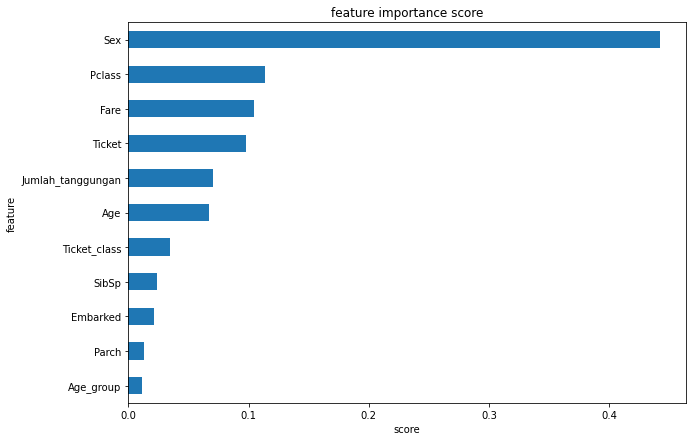

In [83]:
show_feature_importance(rf)

# **Deployment**

# **Result and Recommendation**